In [1]:
import numpy as np
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy.special import iv
from scipy.optimize import curve_fit

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

deriv_dir = os.path.expanduser("../derivatives")
dataframes_dir = os.path.join(deriv_dir, "dataframes")

subjects = [114, 115, 127, 135, 136, 139, 141, 142]
rois = ['V1', 'V2', 'V3', 'V4', 'LO1', 'V3ab', 'IPS0']
tasks = ['perception', 'wm', 'ltm']

task_cmap = {
    'perception': 'darkblue',
    'wm': 'green',
    'ltm': 'orange'
}
roi_label_loc = {roi:rois.index(roi) for roi in rois}

scatter_dot_size = 4
fig_height = 5
fig_width = 5

rois = ["V1", 'V2', 'V3', 'V4', 'LO1', 'V3ab', 'IPS0']
tasks = ['perception', 'wm', 'ltm']
metrics = ['loc_deg', 'amp', 'fwhm']

plt.style.use('seaborn-v0_8')

# Fig 8A-B

In [2]:
# Load Favila data
VM_favila = pd.read_csv(os.path.join(dataframes_dir, "favila_natcomms_2022_tuning.tsv"), sep = '\t', index_col=0)

# Load Woodry data
fname = os.path.join(dataframes_dir, "glmsingle", "allsubj_vmfits_ang_dist_bin.tsv")
vmfits = pd.read_csv(fname, sep = '\t', index_col = 0)

rois = ["V1", 'V2', 'V3', 'V4', 'LO1', 'V3ab', 'IPS0']
vmfits['roi_labels'] = pd.Categorical(vmfits['roi_labels'], categories = rois , ordered = True)

path_pattern = os.path.join(dataframes_dir, "glmsingle/bootstrap_vmfits/allsubj_vmfits_ang_dist_bin_batch_%d.tsv")

rois = ["V1", 'V2', 'V3', 'V4', 'LO1', 'V3ab', 'IPS0']
tasks = ['perception', 'wm', 'ltm']
metrics = ['loc_deg', 'amp', 'fwhm']

df = []
for i in range(1, 21):
    fname = path_pattern % i
    data = pd.read_csv(fname, sep = '\t', index_col = 0)
    data.insert(0, 'batch_num', i)
    df.append(data)
    
df = pd.concat(df)

data_df = []
for roi, task, metric in itertools.product(rois, tasks, metrics + ["loc"]):
    data = df.query("task == @task & roi_labels == @roi")

    CIs = np.quantile(data[metric], [0.16, 0.84, 0.025, 0.975])
    metric_val = vmfits.query("task == @task & roi_labels == @roi")[metric].values[0]

    row = [roi, task, metric, metric_val, *CIs]
    data_df.append(row)

data_df = pd.DataFrame(data_df, columns = ['roi_labels', "task", "metric", "value", "lower_68_CI", "upper_68_CI", "lower_95_CI", "upper_95_CI"])

data_df['roi_labels'] = pd.Categorical(data_df['roi_labels'], categories = rois , ordered = True)
data_df['task_color'] = [str(task_cmap[t]) for t in data_df.task]

VM_woodry = data_df.copy()


In [3]:
# Nearmidfar vmfit dataframe
fname = os.path.join(dataframes_dir, "glmsingle/allsubj_vmfits_ang_dist_bin_nearmidfar.tsv")
nearfar = pd.read_csv(fname, sep = '\t', index_col = 0).query("nearest_dist_bin != 'mid'")
nearfar.insert(len(nearfar.columns), 'roi_labels_loc', nearfar.roi_labels.map(roi_label_loc).values)

within_roi_gap = 0.2
group_indices = {
    'favila_perception' : 2 * within_roi_gap,
    'woodry_perception': 3 * within_roi_gap,
    'favila_ltm': 0 * within_roi_gap,
    'woodry_ltm' : 1 * within_roi_gap,
    'woodry_near': 2 *within_roi_gap,
    'woodry_far': 3 * within_roi_gap
}

roi_gap = 1.5


In [4]:
path_pattern = os.path.join(dataframes_dir, "glmsingle/bootstrap_nearmidfar/allsubj_vmfits_ang_dist_bin_nearmidfar_batch_%d.tsv")

rois = ["V1", 'V2', 'V3', 'V4', 'LO1', 'V3ab', 'IPS0']
tasks = ['perception', 'wm', 'ltm']
metrics = ['loc_deg', 'amp', 'fwhm']
dist_groups = ['near', 'far']

df = []
for i in range(1, 21):
    fname = path_pattern % i
    data = pd.read_csv(fname, sep = '\t', index_col = 0)
    data.insert(0, 'batch_num', i)
    df.append(data)
    
df = pd.concat(df)

data_df = []
for roi, task, dist_group, metric in itertools.product(rois, tasks, dist_groups, metrics + ["loc"]):
    data = df.query("task == @task & roi_labels == @roi & nearest_dist_bin == @dist_group")

    CIs = np.quantile(data[metric], [0.16, 0.84, 0.025, 0.975])
    metric_val = nearfar.query("task == @task & roi_labels == @roi & nearest_dist_bin == @dist_group")[metric].values[0]

    row = [roi, task, dist_group, metric, metric_val, *CIs]
    data_df.append(row)

data_df = pd.DataFrame(data_df, columns = ['roi_labels', "task", "nearest_dist_bin", "metric", "value", "lower_68_CI", "upper_68_CI", "lower_95_CI", "upper_95_CI"])

data_df['roi_labels'] = pd.Categorical(data_df['roi_labels'], categories = rois , ordered = True)
data_df['task_color'] = [str(task_cmap[t]) for t in data_df.task]


/usr/local/Caskroom/miniconda/base/envs/interstellar/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/Caskroom/miniconda/base/envs/interstellar/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


/var/folders/2h/28f74q2d14b9k1nvsyvnn064_091rw/T/ipykernel_49429/2940074698.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(x, y, xerr = xerr, elinewidth = 2, c = 'magenta', fmt = 'o', alpha = 1, ms = 6, marker = 'D', markerfacecolor = 'white', label = dist_group, mew=1)
/var/folders/2h/28f74q2d14b9k1nvsyvnn064_091rw/T/ipykernel_49429/2940074698.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(x, y, xerr = xerr, elinewidth = 2, c = 'darkturquoise', fmt = 'o', alpha = 1, ms = 6, marker = 'D', markerfacecolor = 'white', label = dist_group, mew=1)
/var/folders/2h/28f74q2d14b9k1nvsyvnn064_091rw/T/ipykernel_49429/2940074698.py:82: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> 

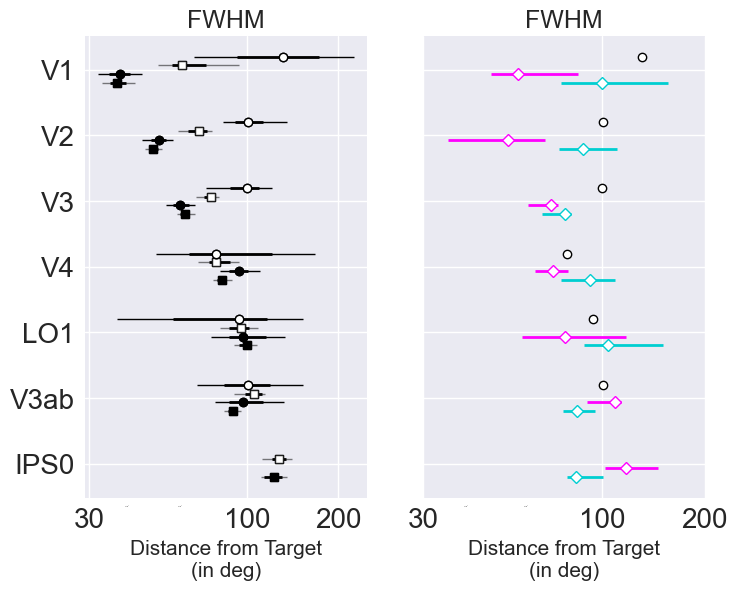

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (8, 6), sharey = True)
task = 'ltm'
val = 'fwhm'
group_var = 'nearest_dist_bin'
metric = 'fwhm'

lims = {
    'loc': [-30, 30],
    'amp': [0, 2],
    'fwhm': [30, 200]
}

# data = nearfar.query("task == @task")
fc = 'black'
stask_colors = {'perception': 'darkslategray', 'ltm': 'darkorange'}

for dist_group in dist_groups:
    ax = axes[1]
    data_group = data_df.query("nearest_dist_bin == @dist_group & task == @task & metric == @metric")

    y = []
    for label in data_group.roi_labels:
        y_pos = rois.index(label)*(roi_gap) + group_indices['woodry_%s' % dist_group]
        y.append(y_pos)

    # Boot fits
    x = data_group.value
    xerr = [x - data_group.lower_68_CI, data_group.upper_68_CI - x]

    if dist_group == 'far': 
        ax.errorbar(x, y, xerr = xerr, elinewidth = 2, c = 'darkturquoise', fmt = 'o', alpha = 1, ms = 6, marker = 'D', markerfacecolor = 'white', label = dist_group, mew=1)
    else:
        ax.errorbar(x, y, xerr = xerr, elinewidth = 2, c = 'magenta', fmt = 'o', alpha = 1, ms = 6, marker = 'D', markerfacecolor = 'white', label = dist_group, mew=1)
   

    ax.set_xlim(lims[metric])
    

    ax.set_xscale('log')
    ax.set_xticks([30, 100, 200])
    ax.set_xticklabels([30, 100, 200])
    ax.set_title('FWHM', size = 18)
    ax.set_xlabel("Distance from Target\n(in deg)", size = 15)
    
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=0)

axes[0].invert_yaxis()


# data_rob = VM_comparison.query("experimenter == 'woodry'")
# data_serra = VM_comparison.query("experimenter == 'favila'")
data_rob = VM_woodry.copy()
data_serra = VM_favila.copy()

tasks = ['perception', 'ltm']
metric = 'fwhm'


for task in tasks:
    data_r = data_rob.query("task == @task & metric == @metric")
    data_s = data_serra.query("task == @task & metric == @metric")

    ax = axes[0]

    y_r = []
    for label in data_r.roi_labels:
        y_pos = rois.index(label)*(roi_gap) + group_indices['woodry_%s' % task]
        y_r.append(y_pos)

    y_s = []
    for label in data_s.roi_labels:
        y_pos = rois.index(label)*(roi_gap) + group_indices['favila_%s' % task]
        y_s.append(y_pos)
        
    if task == 'ltm':
        mfc = 'white'
    else:
        mfc = 'black'


    ax.errorbar(data_r.value, y_r, xerr = [data_r.value - data_r['lower_68_CI'], data_r['upper_68_CI'] - data_r.value], elinewidth = 2, c = 'black', fmt = 'o', alpha = 1, ms= 6, markerfacecolor = mfc, marker = 's', mew=1)
    ax.errorbar(data_r.value, y_r, xerr = [data_r.value - data_r['lower_95_CI'], data_r['upper_95_CI'] - data_r.value], elinewidth = 1, c = 'black', fmt = 'o', alpha  = 0.5, ms = 6, markerfacecolor = mfc, marker = 's', mew=1)
    ax.errorbar(data_s.value, y_s, xerr = [data_s.value - data_s['lower_68_CI'], data_s['upper_68_CI'] - data_s.value], elinewidth = 2, c = 'black', fmt = 'o', alpha = 1, marker = "o", ms = 6, markerfacecolor = mfc, mew=1)
    ax.errorbar(data_s.value, y_s, xerr = [data_s.value - data_s['lower_95_CI'], data_s['upper_95_CI'] - data_s.value], elinewidth = 1, c = 'black', fmt = 'o', alpha  = 1, marker = "o", ms = 6, markerfacecolor = mfc, mew=1)

    ax.set_yticks((np.asarray([1, 2, 3, 4, 5, 6, 7]) - 1)* roi_gap  + 1.5*within_roi_gap)
    ax.set_yticklabels(rois)



    ax.set_xscale('log')
    ax.set_xticks([30, 100, 200])
    ax.set_xticklabels([30, 100, 200])
    ax.set_title("FWHM", size = 18)
    ax.set_xlabel("Distance from Target\n(in deg)", size = 15)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=0)


    ax = axes[1]
    if task == 'ltm':
        ax.errorbar(data_s.value, y_s, xerr = 0, elinewidth = 1, c = 'black', fmt = 'o', alpha  = 1, marker = "o", ms = 6, markerfacecolor = 'white', mew=1)
        # ax.errorbar(data_r.value, y_r, xerr = 0, elinewidth = 1, c = 'black', fmt = 'o', alpha  = 1, marker = "s", ms = 6, markerfacecolor = 'white', mew=1)

# plt.savefig(os.path.join("images", "fig8A-B.pdf") , transparent = False)